In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import array
from datetime import datetime
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

In [77]:
activity = pd.read_csv("./haverhill-request/haverhill-activity.csv")
request = pd.read_csv("./haverhill-request/haverhill-request.csv", encoding = 'unicode_escape')

In [78]:
activity.head()

,Activity ID,Activity Type,Activity Code,Activity Date,Request ID
0,9821,Created,9,2017-01-03 13:11:00,5130
1,9822,Activity entered,7,2017-01-03 13:11:00,5130
2,9823,Service Request Type changed,5,2017-01-03 13:20:00,5130
3,9824,Routed,1,2017-01-03 13:20:00,5130
4,9825,Service Request Type changed,5,2017-01-03 13:21:00,5130


In [79]:
activity.shape

(187187, 5)

In [80]:
request.head()

,Request ID,Create Date,Master Request,Has Links,Status,Status Code,Last Action,Last Change,Close Date,Work Order Created,...,Cross Street ID,Cross Street,District ID,District,Escalations,Priority,Longitude,Latitude,Origin ID,Origin
0,5130,2017-01-03 13:11:00,0,False,Closed,1,2017-01-03 14:05:00,2017-01-03 14:05:00,2017-01-03 14:05:00,False,...,0,NaN,1,Mt Washington,0,2,-71.105902,42.767552,1,Call Center
1,5131,2017-01-03 13:29:00,0,False,Closed,1,2017-01-03 13:29:00,2017-01-03 13:29:00,2017-01-03 13:29:00,False,...,0,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center
2,5132,2017-01-03 13:33:00,0,False,Closed,1,2017-01-03 13:33:00,2017-01-03 13:33:00,2017-01-03 13:33:00,False,...,0,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center
3,5133,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,0,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center
4,5134,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,0,NaN,0,NaN,0,2,0.000000,0.000000,1,Call Center


In [81]:
request.shape

(70060, 33)

In [82]:
request_grouped_by_origin = request.groupby(['Origin'])

In [83]:
# request.groupby(['Origin']).count().plot(kind='bar')
counts = request.groupby('Origin')['Request ID'].agg(len)

In [84]:
print(counts)

Origin
Call Center           66870
Control Panel           724
Report2Gov Android      110
Report2Gov Website        2
Report2Gov iOS          321
Text Message              5
Website                2028
Name: Request ID, dtype: int64


In [121]:
origins = request['Origin'].unique()
np.arange(len(origins))

array([0, 1, 2, 3, 4, 5, 6])

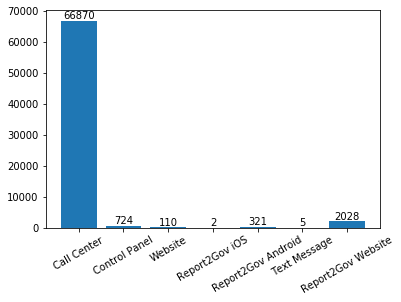

In [131]:
fig, ax = plt.subplots()
plt.xticks(np.arange(len(origins)),origins,rotation=30)
bars = plt.bar(np.arange(len(origins)),counts)
for i,rect in enumerate(bars):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,counts[i], ha='center', va='bottom')

In [139]:
request.groupby('City')['Request ID'].agg(len)

City
Groveland            2
Haverhill        70057
North Andover        1
Name: Request ID, dtype: int64

In [166]:
request['Close Date'] = request['Close Date'].astype('str')

In [214]:
diff_time = []
for i,time in tqdm(enumerate(request['Create Date'].values),total = len(request['Create Date'].values)):
    timecreated = datetime.strptime(time, "%Y-%m-%d %H:%M:%S")
    if request['Close Date'][i] != 'nan':
        timeclosed = datetime.strptime(request['Close Date'][i], "%Y-%m-%d %H:%M:%S")
        diff_time.append(timeclosed - timecreated)
    else:
        diff_time.append('nan')
        pass
    
    
    

In [215]:
request['Completion Time'] = diff_time

In [216]:
request.head()

,Request ID,Create Date,Master Request,Has Links,Status,Status Code,Last Action,Last Change,Close Date,Work Order Created,...,District,Escalations,Priority,Longitude,Latitude,Origin ID,Origin,CompletionTime,DayofWeek,Completion Time
0,5130,2017-01-03 13:11:00,0,False,Closed,1,2017-01-03 14:05:00,2017-01-03 14:05:00,2017-01-03 14:05:00,False,...,Mt Washington,0,2,-71.105902,42.767552,1,Call Center,00:54:00,1,00:54:00
1,5131,2017-01-03 13:29:00,0,False,Closed,1,2017-01-03 13:29:00,2017-01-03 13:29:00,2017-01-03 13:29:00,False,...,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00
2,5132,2017-01-03 13:33:00,0,False,Closed,1,2017-01-03 13:33:00,2017-01-03 13:33:00,2017-01-03 13:33:00,False,...,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00
3,5133,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00
4,5134,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00


In [188]:
# request.groupby('Request Type')['Request ID'].agg(len)

In [217]:
dayofweek = []
for i,time in enumerate(request['Create Date'].values):
#     dayofweek = 
    dayofweek.append(datetime.strptime(time, "%Y-%m-%d %H:%M:%S").weekday())
#     print(dayofweek)
#     request['DayofWeek'][i] = dayofweek

In [218]:
request['DayofWeek'] = dayofweek

In [219]:
request.head()

,Request ID,Create Date,Master Request,Has Links,Status,Status Code,Last Action,Last Change,Close Date,Work Order Created,...,District,Escalations,Priority,Longitude,Latitude,Origin ID,Origin,CompletionTime,DayofWeek,Completion Time
0,5130,2017-01-03 13:11:00,0,False,Closed,1,2017-01-03 14:05:00,2017-01-03 14:05:00,2017-01-03 14:05:00,False,...,Mt Washington,0,2,-71.105902,42.767552,1,Call Center,00:54:00,1,00:54:00
1,5131,2017-01-03 13:29:00,0,False,Closed,1,2017-01-03 13:29:00,2017-01-03 13:29:00,2017-01-03 13:29:00,False,...,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00
2,5132,2017-01-03 13:33:00,0,False,Closed,1,2017-01-03 13:33:00,2017-01-03 13:33:00,2017-01-03 13:33:00,False,...,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00
3,5133,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00
4,5134,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,NaN,0,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00


In [323]:
counts = request.groupby('DayofWeek')['Request ID'].agg(len)

In [324]:
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

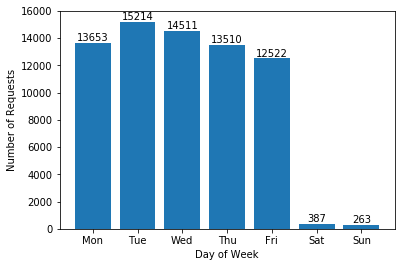

In [325]:
# print(counts)
fig, ax = plt.subplots()
plt.xticks(np.arange(len(request['DayofWeek'].unique())),days,rotation=0)
bars = plt.bar(np.arange(len(request['DayofWeek'].unique())),counts)
plt.xlabel('Day of Week')
plt.ylabel('Number of Requests')
for i,rect in enumerate(bars):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,counts[i], ha='center', va='bottom')

In [229]:
month = []
for i,time in enumerate(request['Create Date'].values):
    month.append(datetime.strptime(time, "%Y-%m-%d %H:%M:%S").month)
    

In [230]:
request['Month'] = month

In [233]:
# request.head()
seasons = {'Spring':[4,5],'Summer':[6,7,8],'Fall':[9,10,11],'Winter':[12,1,2,3]}

In [234]:
print(seasons.keys())

dict_keys(['Spring', 'Summer', 'Fall', 'Winter'])


In [236]:
counts = request.groupby('Month')['Request ID'].agg(len)

In [247]:
seasoncounts = []
for key in seasons:
    seasoncounts.append(counts[seasons[key]].sum())

In [248]:
print(seasoncounts)

[14017, 19372, 14442, 22229]


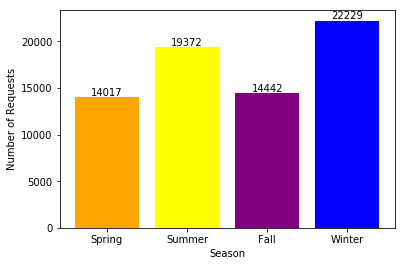

In [321]:
fig, ax = plt.subplots()
plt.xticks(np.arange(len(seasoncounts)),seasons.keys(),rotation=0)
bars = plt.bar(np.arange(len(seasoncounts)),seasoncounts, color=['orange', 'yellow', 'purple', 'blue'])
plt.xlabel('Season')
plt.ylabel('Number of Requests')
for i,rect in enumerate(bars):
    height = rect.get_height()
#     print(height)
#     print(rect.get_y())
#     print(rect.get_width())
    plt.text(rect.get_x() + rect.get_width()/2.0, height,seasoncounts[i], ha='center', va='bottom')

In [258]:
requesttypecounts = request.groupby('Request Type')['Request ID'].agg(len).sort_values(ascending = False)

In [315]:
# request.groupby('Request Type')['Request Type'].agg(len).sort_values(ascending = False)[0:20]

In [316]:
r_top20 = request.groupby('Request Type')['Request Type'].agg(len).sort_values(ascending = False)[0:20]

In [349]:
# print(r_top20)

In [284]:
top20names = ['A - Information Other',                               
'A - Transfer Inspections',                             
'A - Transfer Other',                                    
'A - Transfer Treasurer',                                
'A - Information Treasurer',                             
'A - Transfer Assessor',                                 
'Highway - Pothole',                                     
'A - Information Assessor',                              
'Snow Removal Issues - Sanding Request',                 
'Tree Issues - City Owned Tree Issue',                    
'Snow Removal Issues - Replow Request',                   
'TRASH - Missed Pick Up',                                 
'Traffic/Street Lights - Street Light Repair',            
'A - Information Inspections',                            
'Highway - Sidewalk Issues',                              
'Highway - Street issues',                                
'Tree Issues - Tree Pruning/Trimming',                    
'Street Sign Issues - Street Signs Missing/Damaged',      
'Highway - Overgrown grass/weeds',                        
'Tree Issues - tree limb pickup']                  

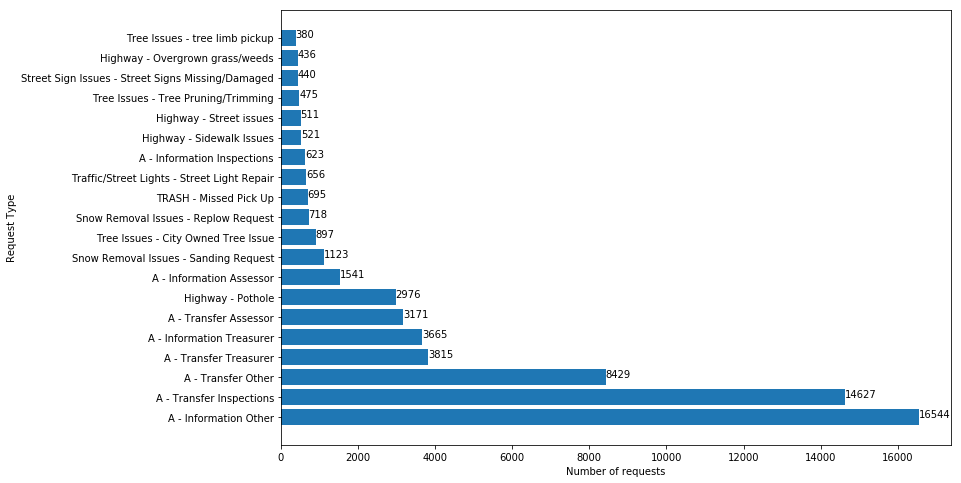

In [319]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(len(r_top20)),top20names,rotation=0)
bars = plt.barh(np.arange(len(r_top20)),r_top20)
plt.xlabel('Number of requests')
plt.ylabel('Request Type')
for i,rect in enumerate(bars):
    width = rect.get_width()
    plt.text(width,rect.get_height()/2+rect.get_y(),r_top20[i])

In [327]:
year = []
for i,time in tqdm(enumerate(request['Create Date'].values),total = len(request['Create Date'].values)):
    timecreated = datetime.strptime(time, "%Y-%m-%d %H:%M:%S")
    year.append(timecreated.year)

In [328]:
request['Year'] = year

In [329]:
request.head()

,Request ID,Create Date,Master Request,Has Links,Status,Status Code,Last Action,Last Change,Close Date,Work Order Created,...,Priority,Longitude,Latitude,Origin ID,Origin,CompletionTime,DayofWeek,Completion Time,Month,Year
0,5130,2017-01-03 13:11:00,0,False,Closed,1,2017-01-03 14:05:00,2017-01-03 14:05:00,2017-01-03 14:05:00,False,...,2,-71.105902,42.767552,1,Call Center,00:54:00,1,00:54:00,1,2017
1,5131,2017-01-03 13:29:00,0,False,Closed,1,2017-01-03 13:29:00,2017-01-03 13:29:00,2017-01-03 13:29:00,False,...,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00,1,2017
2,5132,2017-01-03 13:33:00,0,False,Closed,1,2017-01-03 13:33:00,2017-01-03 13:33:00,2017-01-03 13:33:00,False,...,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00,1,2017
3,5133,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00,1,2017
4,5134,2017-01-03 13:47:00,0,False,Closed,1,2017-01-03 13:47:00,2017-01-03 13:47:00,2017-01-03 13:47:00,False,...,2,0.000000,0.000000,1,Call Center,00:00:00,1,00:00:00,1,2017


In [343]:
yearcounts = request.groupby('Year')['Year'].agg(len)

In [344]:
years = ['2017', '2018','2019']

In [347]:
print(yearcounts.shape)

(3,)


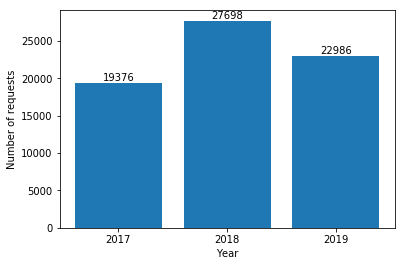

In [348]:
plt.figure()
plt.xticks(np.arange(len(years)),years,rotation=0)
bars = plt.bar(np.arange(len(years)),yearcounts)
plt.ylabel('Number of requests')
plt.xlabel('Year')
for i,rect in enumerate(bars):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,list(yearcounts)[i], ha='center', va='bottom')

In [369]:
gb_type = request.groupby('Request Type')
gb_type_list = [gb_type.get_group(x) for x in gb_type.groups]

In [435]:
avgtime_type = {}
for i,group in enumerate(gb_type_list):
    temp = list(set(group['Request Type']))
    avgtime_type[temp[0]] = group['CompletionTime'].mean()

In [444]:
# avgtime_type

In [445]:
top20avgtimes = []
for i,name in enumerate(top20names):
#     print(name)
#     print(avgtime_type.keys())
    try:
        top20avgtimes.append(avgtime_type[name])
    except:
        if name == 'A - Information Treasurer':
            top20avgtimes.append(avgtime_type[name+" "])
    
            

In [446]:
# top20avgtimes

In [454]:
gb_dept = request.groupby('Department')
gb_dept_list = [gb_dept.get_group(x) for x in gb_dept.groups]
# print(gb_dept_list)

In [456]:
avgtime_dept = {}
for i,group in enumerate(gb_dept_list):
    temp = list(set(group['Department']))
#     print(temp)
    avgtime_dept[temp[0]] = group['CompletionTime'].mean()

In [458]:
# avgtime_dept

In [463]:
sum(seasoncounts)

70060

In [466]:
sizes = []
for i,count in enumerate(seasoncounts):
#     print(i,count)
    sizes.append((count/sum(seasoncounts))*360)

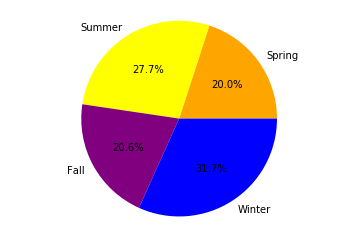

In [482]:
# sizes = [15, 30, 45, 10]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.figure()
plt.pie(sizes, explode=explode, labels=seasons.keys(), autopct='%1.1f%%', colors = ['orange', 'yellow', 'purple', 'blue'],
        shadow=False, startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [489]:
request.groupby('Department')['Department'].agg(len)

Department
311 Call Center                25014
Animal control                   168
Assessing                          2
City Clerk                         5
Fire                              34
Fire & Police                    109
Highway                        15100
Inspectional Services            313
Mayor                             22
Planning                           6
Police                           104
Stormwater/Sewer                 371
Treasurer                          7
Water                            171
Water Billing                     10
Water/Wastewater Department       81
Name: Department, dtype: int64

In [497]:
request.loc[request['Department'] == 'Assessing']
# df.loc[df['column_name'] == some_value]

,Request ID,Create Date,Master Request,Has Links,Status,Status Code,Last Action,Last Change,Close Date,Work Order Created,...,Priority,Longitude,Latitude,Origin ID,Origin,CompletionTime,DayofWeek,Completion Time,Month,Year
1283,6419,2017-01-30 14:01:00,0,False,Closed,1,2017-01-30 17:22:00,2017-01-30 17:22:00,2017-01-30 17:22:00,False,...,2,0.0,0.0,1,Call Center,03:21:00,0,03:21:00,1,2017
2592,7730,2017-02-16 16:38:00,0,False,Closed,1,2017-02-16 19:43:00,2017-02-16 19:43:00,2017-02-16 19:43:00,False,...,2,0.0,0.0,1,Call Center,03:05:00,3,03:05:00,2,2017
